In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [2]:
# ## Reddit ADHD Dataset - EDA and Preprocessing

# ### 1. Load and Clean Data
import pandas as pd
from text_utils import preprocess_text, tokenize_text, generate_wordcloud, plot_top_ngrams

df = pd.read_csv("../../Reddit Data Gathering/Filtered Data/filtered_cleaned_ADHD.csv")
df.drop_duplicates(subset="post_text", inplace=True)
df = df[df["post_text"].notna()]

# Suppress family/relationship terms for THIS subreddit only
SUPPRESS_FAMILY_TERMS = True   # set False (or delete this block) for postpartum/bereavement subs
if SUPPRESS_FAMILY_TERMS:
    import text_utils as tu  # access the module to patch its global stopword set
    FAMILY_TERMS = {
        "friend","friends","partner","relationship","relationships",
        "mom","mother","dad","father","parents","parent",
        "son","daughter","sister","brother","husband","wife","boyfriend","girlfriend","family"
    }
    tu.custom_stopwords |= FAMILY_TERMS
    print("Family terms suppressed for this run:", sorted(list(FAMILY_TERMS))[:8], "...")

# ### 2. Preprocess Text

df["clean_text"] = df["post_text"].apply(preprocess_text)

# ### 3. Tokenisation Column

df["tokens"] = df["clean_text"].apply(tokenize_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tusharbansal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tusharbansal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tusharbansal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tusharbansal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Family terms suppressed for this run: ['boyfriend', 'brother', 'dad', 'daughter', 'family', 'father', 'friend', 'friends'] ...


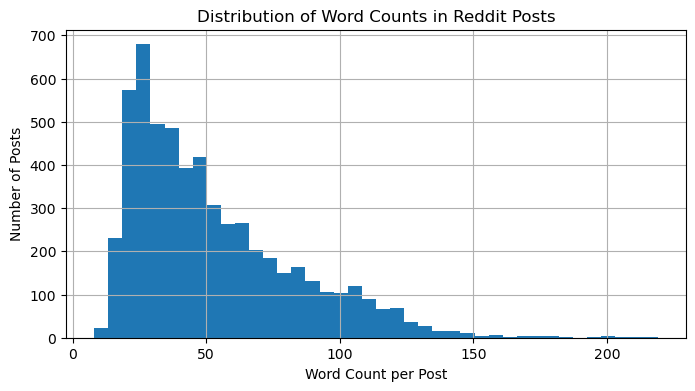

In [3]:
# ### 4. Word Count Histogram

df["word_count"] = df["clean_text"].str.split().str.len()
df["word_count"].hist(bins=40, figsize=(8, 4), grid=True)
plt.xlabel("Word Count per Post")
plt.ylabel("Number of Posts")
plt.title("Distribution of Word Counts in Reddit Posts")
plt.show()

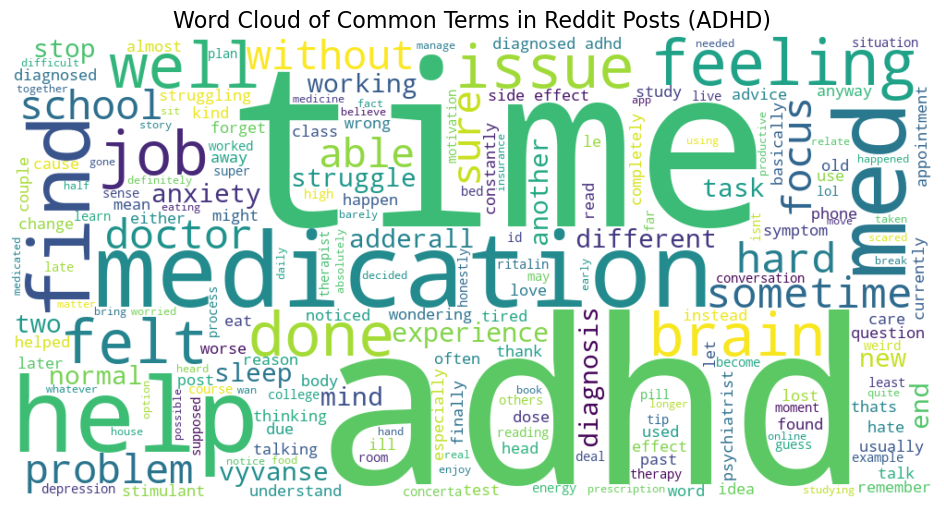

In [4]:
# ### 5. Word Cloud

generate_wordcloud(df["clean_text"], title="Word Cloud of Common Terms in Reddit Posts (ADHD)")

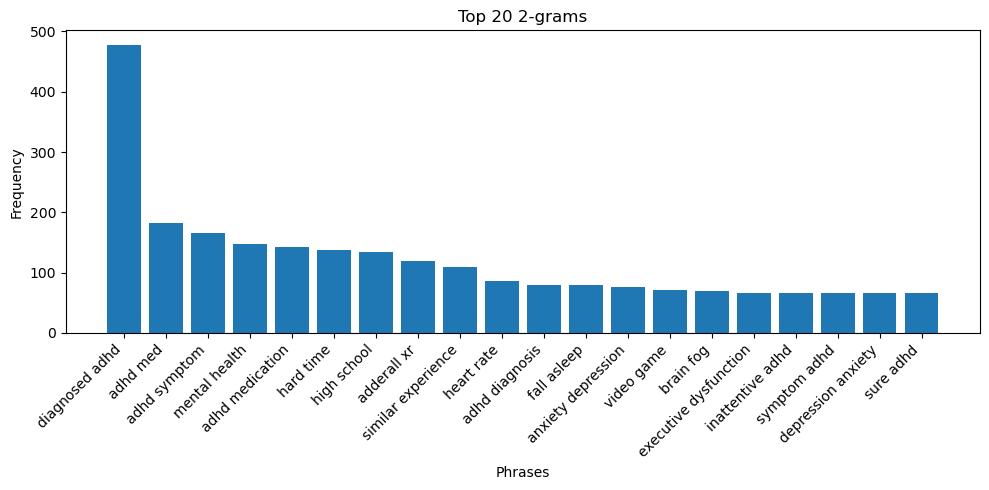

In [5]:
# Bigrams
plot_top_ngrams(df["clean_text"], n=2, top_k=20)

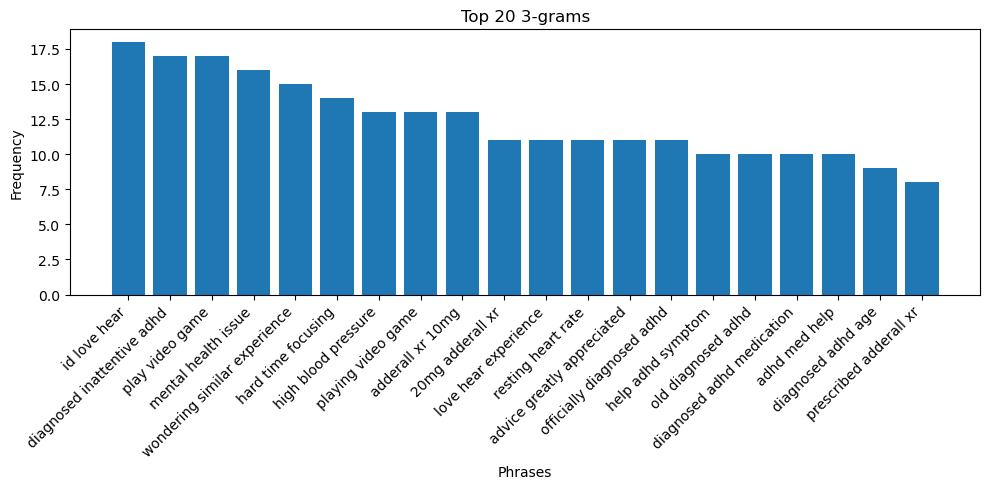

In [6]:
# Trigrams
plot_top_ngrams(df["clean_text"], n=3, top_k=20)

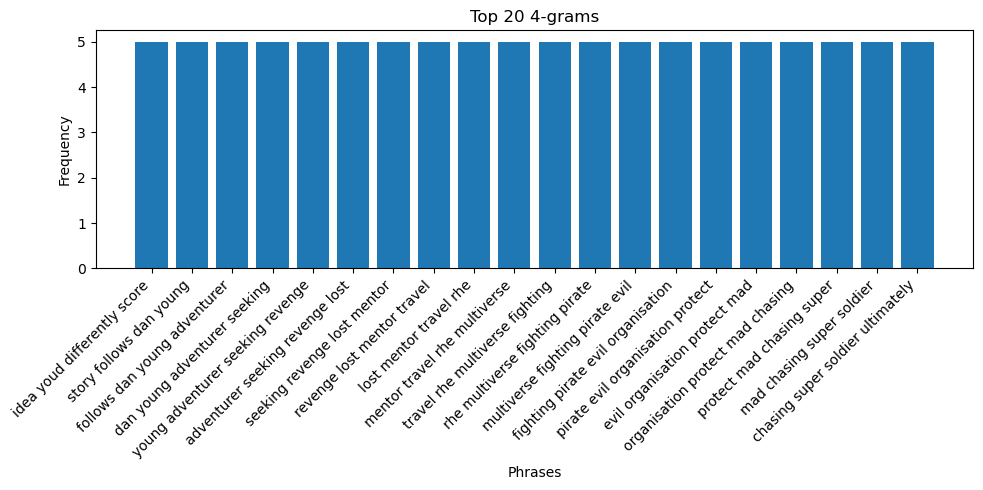

In [7]:
# Quadgrams
plot_top_ngrams(df["clean_text"], n=4, top_k=20)

In [8]:
# ### 7. Sample Output
print(df[["post_text", "clean_text", "tokens"]].head(2))

                                           post_text  \
0  My psychiatrist recently decided to switch me ...   
1  I’ve had some trouble at uni recently, I spoke...   

                                          clean_text  \
0  psychiatrist decided switch concerta strattera...   
1  ’ trouble uni spoke favorite teacher another t...   

                                              tokens  
0  [psychiatrist, decided, switch, concerta, stra...  
1  [’, trouble, uni, spoke, favorite, teacher, an...  


In [9]:
import os

# Create the folder if it doesn't exist
output_folder = "EDA Completed Data"
os.makedirs(output_folder, exist_ok=True)

# Save the dataframe with tokens column
output_path = os.path.join(output_folder, "adhd_eda_completed.csv")
df.to_csv(output_path, index=False)

print(f"✅ Saved processed data to: {output_path}")


✅ Saved processed data to: EDA Completed Data/adhd_eda_completed.csv


# ✅ Project Progress Summary

This notebook handles **Exploratory Data Analysis (EDA)** for the filtered Reddit posts related to mental health. Below is a summary of what has been implemented so far.

---

## 📁 `main.ipynb` — EDA Notebook

- 🔹 Loaded `filtered_cleaned_depression.csv` dataset
- 🔹 Imported required libraries: `pandas`, `matplotlib.pyplot`, `seaborn`
- 🔹 Imported NLP utility functions from `text_utils.py`
- 🔹 Applied `preprocess_text_column()` to clean the `post_text` column
  - ⤷ Created a new column: `clean_text`
- 🔹 Computed word counts for each post
  - ⤷ Added column: `word_count`
- 🔹 Plotted word count distribution as a histogram
- 🔹 Generated a **Word Cloud** based on cleaned post content
- 🔹 Plotted **Top N-Grams** using `plot_top_ngrams()`:
  - ⤷ Top Bigrams
  - ⤷ Top Trigrams
  - ⤷ Top Quadgrams

---

## 📁 `text_utils.py` — Text Preprocessing Utilities

- 🔹 Imported NLP & regex libraries (`nltk`, `re`, `string`, etc.)
- 🔹 Downloaded NLTK resources (e.g., stopwords, lemmatiser)
- 🔹 Defined `preprocess_text(text)`:
  - Lowercasing
  - Punctuation and digit removal
  - Tokenisation
  - Stopword removal
  - Lemmatisation
- 🔹 Defined `preprocess_text_column(df, col)`:
  - Applies full pipeline on a column of text
  - Returns DataFrame with new `clean_text` column
- 🔹 Defined `plot_top_ngrams(corpus, n, top_k, title)`:
  - Plots most frequent n-grams from the corpus
  - Used for bigrams, trigrams, and quadgrams

---

✅ Next Steps:
- Add sentiment scoring (VADER/TextBlob)
- Label posts for classification
- Explore timelines or user behaviour trends
